In [ ]:
!pip install -q kaggle

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving API_kaggle.json to API_kaggle.json


In [ ]:
#create kaggle folder
! mkdir ~/.kaggle

In [ ]:
#copy json file to folder
! cp API_kaggle.json ~/.kaggle/

In [ ]:
!mv /content/API_kaggle.json /root/.kaggle/kaggle.json

In [ ]:
#permission for JSON to act
! chmod 600 ~/.kaggle/API_kaggle.json

In [ ]:
! kaggle datasets list

ref                                                         title                                               size  lastUpdated          downloadCount  voteCount  usabilityRating  
----------------------------------------------------------  -------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
sudarshan24byte/online-food-dataset                         Online Food Dataset                                  3KB  2024-03-02 18:50:30          20710        415  0.9411765        
sahirmaharajj/retail-sales-analysis                         Retail Sales Analysis                                6MB  2024-03-31 15:37:11           1038         26  1.0              
muhammadkashif724/netflix-tv-shows-2021                     Netflix TV Shows 2021                              384KB  2024-04-04 06:38:21            750         22  0.9411765        
sahirmaharajj/electric-vehicle-population-size-2024         Electric Vehicle Populati

In [ ]:
!kaggle datasets download -d landrykezebou/uot32-underwater-object-tracking-dataset

100% 3.39G/3.40G [01:55<00:00, 31.3MB/s]
100% 3.40G/3.40G [01:55<00:00, 31.5MB/s]


In [ ]:
!unzip uot32-underwater-object-tracking-dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: SeaTurtle1/img/632.jpg  
  inflating: SeaTurtle1/img/633.jpg  
  inflating: SeaTurtle1/img/634.jpg  
  inflating: SeaTurtle1/img/635.jpg  
  inflating: SeaTurtle1/img/636.jpg  
  inflating: SeaTurtle1/img/637.jpg  
  inflating: SeaTurtle1/img/638.jpg  
  inflating: SeaTurtle1/img/639.jpg  
  inflating: SeaTurtle1/img/64.jpg   
  inflating: SeaTurtle1/img/640.jpg  
  inflating: SeaTurtle1/img/641.jpg  
  inflating: SeaTurtle1/img/642.jpg  
  inflating: SeaTurtle1/img/643.jpg  
  inflating: SeaTurtle1/img/644.jpg  
  inflating: SeaTurtle1/img/645.jpg  
  inflating: SeaTurtle1/img/646.jpg  
  inflating: SeaTurtle1/img/647.jpg  
  inflating: SeaTurtle1/img/648.jpg  
  inflating: SeaTurtle1/img/649.jpg  
  inflating: SeaTurtle1/img/65.jpg   
  inflating: SeaTurtle1/img/650.jpg  
  inflating: SeaTurtle1/img/651.jpg  
  inflating: SeaTurtle1/img/652.jpg  
  inflating: SeaTurtle1/img/653.jpg  
  inflating: SeaTurtle1/img/654.jpg  

In [ ]:
!pip install opencv-python numpy


In [ ]:
!pip install opencv-python transformers

All PyTorch model weights were used when initializing TFGPT2Model.

All the weights of TFGPT2Model were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFGPT2Model for predictions without further training.


Enter enhancement instructions: Mask the image
Original Image


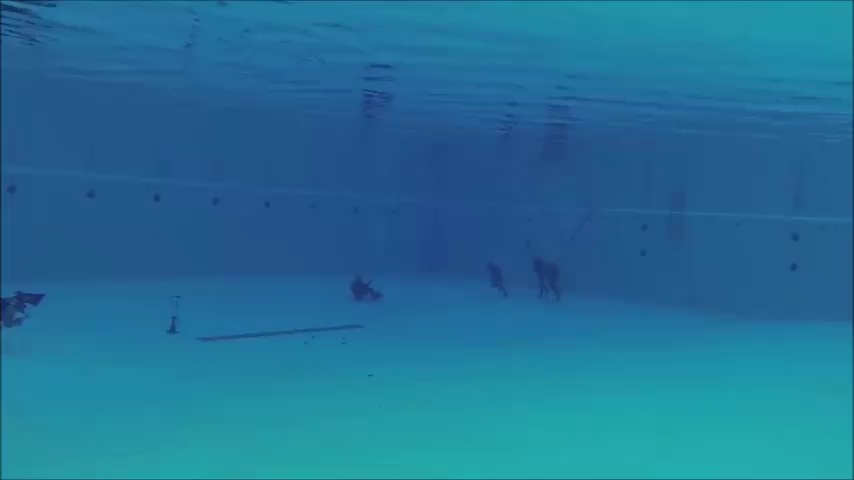

Enhanced Image


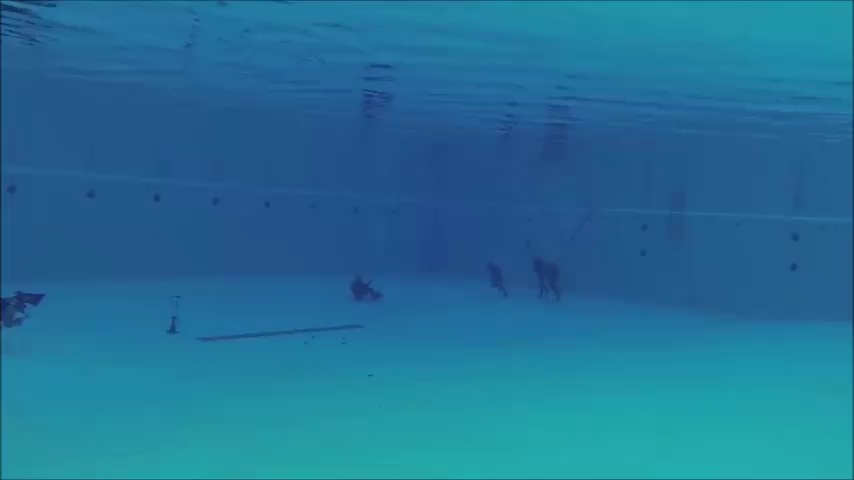

In [ ]:
import cv2
import tensorflow as tf
from transformers import GPT2Tokenizer, TFGPT2Model
from google.colab.patches import cv2_imshow

# Load pre-trained GPT model and tokenizer
tokenizer = GPT2Tokenizer.from_pretrained("gpt2")
gpt_model = TFGPT2Model.from_pretrained("gpt2")

def preprocess_text(prompt):
    # Tokenize and encode the prompt
    inputs = tokenizer(prompt, return_tensors="tf", max_length=512, truncation=True)
    return inputs

def enhance_image(image, instructions):
    # Text to Image Enhancement instructions
    # Currently, we'll just use bicubic interpolation for upscaling
    if 'upscale' in instructions:
        upscale_factor = 2
        h, w, _ = image.shape
        new_h, new_w = h * upscale_factor, w * upscale_factor
        enhanced_image = cv2.resize(image, (new_w, new_h), interpolation=cv2.INTER_CUBIC)
    else:
        enhanced_image = image
    return enhanced_image

def main():
    # Load your image
    image_path = "/content/ArmyDiver1/img/1.jpg"
    image = cv2.imread(image_path)
    if image is None:
        print("Error: Unable to load image!")
        return

    # User input for enhancement instructions
    instructions = input("Enter enhancement instructions: ")

    # Enhance image based on instructions
    enhanced_image = enhance_image(image, instructions)

    # Display original and enhanced images
    print("Original Image")
    cv2_imshow(image)
    print("Enhanced Image")
    cv2_imshow(enhanced_image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

if __name__ == "__main__":
    main()


Resized image


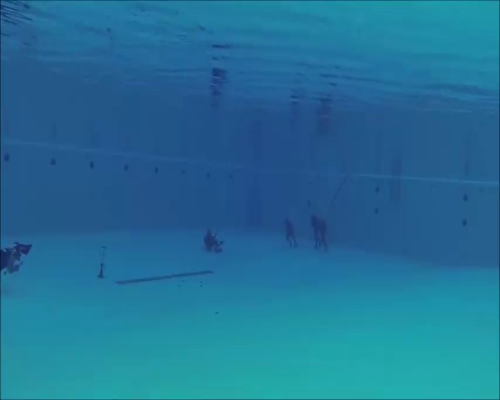

Epoch [1/10], Loss: 51.6279411315918
Epoch [2/10], Loss: 51.6279411315918
Epoch [3/10], Loss: 51.6279411315918
Epoch [4/10], Loss: 51.6279411315918
Epoch [5/10], Loss: 51.6279411315918
Epoch [6/10], Loss: 51.6279411315918
Epoch [7/10], Loss: 51.6279411315918
Epoch [8/10], Loss: 51.6279411315918
Epoch [9/10], Loss: 51.6279411315918
Epoch [10/10], Loss: 51.6279411315918
Enhanced Image


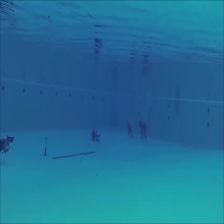

In [ ]:
import torch
from transformers import GPT2Tokenizer, GPT2Model
import torch.nn as nn
import torch.optim as optim
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

# Define new_width and new_height
new_width = 500
new_height = 400

# Load the image
img = cv2.imread('/content/ArmyDiver1/img/10.jpg')

# Check if the image is loaded successfully
if img is None:
    print("Error: Unable to load image")
else:
    # Ensure the image is not empty
    if not img.size == 0:
        # Resize the image
        resized_img = cv2.resize(img, (new_width, new_height))
        # Display or save the resized image
        print("Resized image")
        cv2_imshow(resized_img)
        cv2.waitKey(0)
        cv2.destroyAllWindows()
    else:
        print("Error: The loaded image is empty")
class ImageEmbeddingCNN(nn.Module):
    def __init__(self):
        super(ImageEmbeddingCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 64, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1)
        self.conv3 = nn.Conv2d(128, 256, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.conv1(x))
        x = self.pool(x)
        x = self.relu(self.conv2(x))
        x = self.pool(x)
        x = self.relu(self.conv3(x))
        x = self.pool(x)
        return x

# Load pre-trained GPT-2 model and tokenizer
tokenizer = GPT2Tokenizer.from_pretrained('gpt2')
model = GPT2Model.from_pretrained('gpt2')

# Define image embedding CNN
image_embedding_cnn = ImageEmbeddingCNN()

# Define optimizer and loss function
optimizer = optim.Adam(image_embedding_cnn.parameters(), lr=0.001)
criterion = nn.MSELoss()

# Load input image
input_image = cv2.imread('/content/ArmyDiver1/img/10.jpg')
input_image = cv2.resize(input_image, (224, 224))  # Resize for fixed input size
input_tensor = torch.tensor(input_image / 255.0, dtype=torch.float32).permute(2, 0, 1).unsqueeze(0)

# Training loop (simplified for demonstration)
num_epochs = 10
for epoch in range(num_epochs):
    optimizer.zero_grad()

    # Forward pass through image embedding CNN
    image_embedding = image_embedding_cnn(input_tensor)

    # Convert image embedding to textual representation
    text_input = tokenizer.convert_tokens_to_ids(tokenizer.tokenize(str(image_embedding.detach().numpy().flatten())))

    # Forward pass through GPT-2 model
    outputs = model(torch.tensor([text_input]))

    # Compute loss (just a placeholder, not meaningful in this context)
    loss = criterion(outputs.last_hidden_state, torch.zeros_like(outputs.last_hidden_state))

    # Backpropagation and optimization
    loss.backward()
    optimizer.step()

    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item()}')

# Output the enhanced image (just a placeholder)
enhanced_image = input_image  # Placeholder for now, the actual enhancement logic would go here
print("Enhanced Image")
cv2_imshow(enhanced_image)
cv2.waitKey(0)
cv2.destroyAllWindows()
